# Field Switching 
On the cryo probe station

In [1]:
cd ..

C:\Users\qlab\Documents\GitHub\Auspex


In [2]:
from experiments.Field_Switching import FieldSwitchingExperiment
from auspex.filters.io import WriteToHDF5
from auspex.filters.plot import Plotter
import datetime
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sample_name = "CSHE-Die7-C6R7"
date = datetime.datetime.today().strftime('%Y-%m-%d')
file_path = "data\CSHE-Switching\{samp:}\{samp:}-FieldSwitch_{date:}.h5".format(samp=sample_name, date=date)

exp = FieldSwitchingExperiment()
wr  = WriteToHDF5(file_path)
plot = Plotter(notebook=True)

edges = [(exp.resistance, wr.sink),
         (exp.resistance, plot.sink)]
exp.set_graph(edges)

fields = np.linspace(-0.035,0.035,81)
fields = np.append(fields, np.flipud(fields))
main_sweep = exp.add_sweep(exp.field,fields)
exp.run_sweeps()

Loading BokehJS ...

Killing bokeh server thread 11116
Killing child process 12108


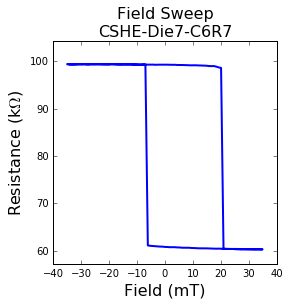

In [12]:
%matplotlib inline
with h5py.File(wr.filename) as f:
    data = f['data'].value
    Hs = data['field'][:]
    Rs = data['resistance'][:]

    fig = plt.figure(figsize=(4,4))
    plt.plot(Hs*1e3, Rs*1e-3,'-', lw=2)
    plt.ylim(Rs.min()*0.95e-3, Rs.max()*1.05e-3)
    plt.xlabel('Field (mT)', size=16)
    plt.ylabel(r'Resistance (k$\Omega$)', size=16)
    plt.title('Field Sweep\n{}'.format(sample_name), size=16)
    plt.show()

In [7]:
# Estimate TMR
TMR = (np.max(Rs)-np.min(Rs))/np.min(Rs)
print("TMR = {:.0f}%".format(100*TMR))

TMR = 65%


In [8]:
# Find the center of the loop of coercivity
mid = np.mean([np.max(Rs),np.min(Rs)])
transition_pos = Hs[np.where(np.diff(np.sign(Rs - mid)))[0][0]]
transition_neg = Hs[np.where(np.diff(np.sign(Rs - mid)))[0][-1]]
print(transition_pos)
print(transition_neg)
print("Center is at {:.1f} G".format(1e4*(transition_neg + transition_pos)*0.5))
print("Coercivity is {:.1f} G".format(1e4*(transition_pos - transition_neg)*0.5))

0.020125
-0.006125
Center is at 70.0 G
Coercivity is 131.2 G
